In [2]:
#Data Loading
#loading dataset & importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
file_path = 'datasets/dataset_reoffending.csv'
df = pd.read_csv(file_path)

#display basic information about the dataset
df_info = df.info()
df_head = df.head()
df_describe = df.describe()

df_info, df_head, df_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    25835 non-null  int64  
 1   gender                                25835 non-null  object 
 2   race                                  25835 non-null  object 
 3   age                                   25835 non-null  object 
 4   address                               25835 non-null  int64  
 5   gang_affiliated                       22668 non-null  object 
 6   risk_score                            25360 non-null  float64
 7   supervision_level                     24115 non-null  object 
 8   education_level                       25835 non-null  object 
 9   dependents                            25835 non-null  object 
 10  offence                               22558 non-null  object 
 11  years_in_prison

(None,
    id gender   race          age  address gang_affiliated  risk_score  \
 0   1      M  black        43-47       16           False         3.0   
 1   2      M  black        33-37       16           False         6.0   
 2   3      M  black  48 or older       24           False         7.0   
 3   4      M  white        38-42       16           False         7.0   
 4   5      M  white        33-37       16           False         4.0   
 
   supervision_level        education_level dependents  ...  \
 0          Standard  At least some college  3 or more  ...   
 1       Specialized   Less than HS diploma          1  ...   
 2              High  At least some college  3 or more  ...   
 3              High   Less than HS diploma          1  ...   
 4       Specialized   Less than HS diploma  3 or more  ...   
 
   cocaine_positive_tests meth_positive_tests other_positive_tests  \
 0                    0.0            0.000000                  0.0   
 1                    0.0  

In [3]:
#Data Cleaning and Preprocessing

#Handling missing values

#for simplicity, i'll fill missing numerical values with the median, and categorical with the mode
for column in df.columns:

    if df[column].dtype == 'object':  # categorical
        df[column].fillna(df[column].mode()[0], inplace=True)

    else:  # numerical data
        df[column].fillna(df[column].median(), inplace=True)

#encode categorical variables
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)



#normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



#won't normalize the 'id' column as it's just an identifier
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('id')
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])



#checking the dataset after preprocessing
df_encoded_head = df_encoded.head()
df_encoded_info = df_encoded.info()



df_encoded_head, df_encoded_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Columns: 119 entries, id to reoffended_in_year_3_True
dtypes: bool(109), float64(9), int64(1)
memory usage: 4.7 MB


(   id   address  risk_score  days_between_drug_tests  \
 0   1  0.510009   -1.305700                 5.084251   
 1   2  0.510009   -0.034205                -0.473872   
 2   3  1.631462    0.389627                 0.085477   
 3   4  0.510009    0.389627                -0.572883   
 4   5  0.510009   -0.881869                -0.594894   
 
    marijuana_positive_tests  cocaine_positive_tests  meth_positive_tests  \
 0                 -0.400894               -0.199684            -0.189436   
 1                 -0.400894               -0.199684            -0.189436   
 2                  2.236520               -0.199684             2.873026   
 3                 -0.400894               -0.199684            -0.189436   
 4                 -0.400894               -0.199684             0.891433   
 
    other_positive_tests  days_employed  jobs_per_year  ...  \
 0             -0.163541       0.015076      -0.396228  ...   
 1             -0.163541      -0.135284       1.541149  ...   
 2 

# Preprocessing and Data Cleaning
Handling missing values, encoding categorical variables etc.

- Handle missing data if any (by removing rows/columns).
- Converting variables into different forms


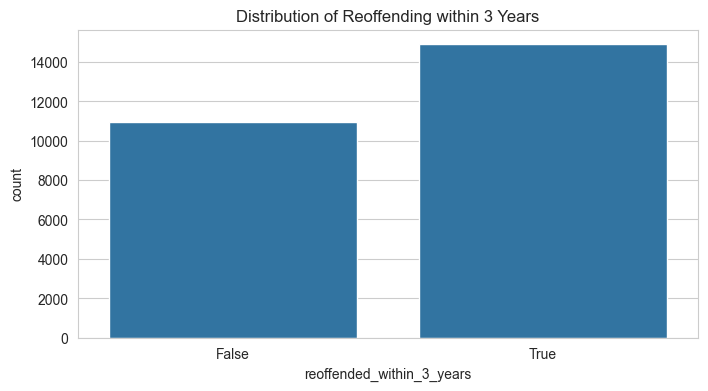

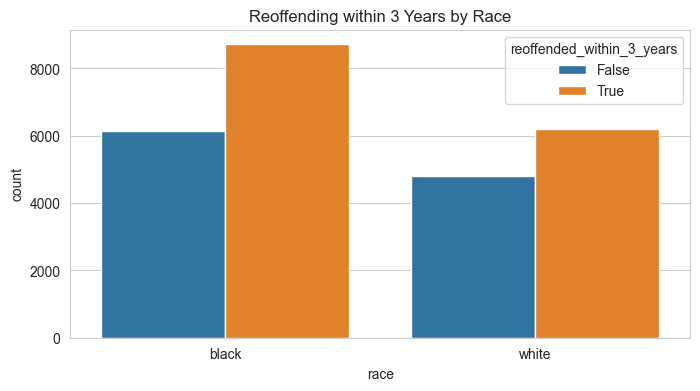

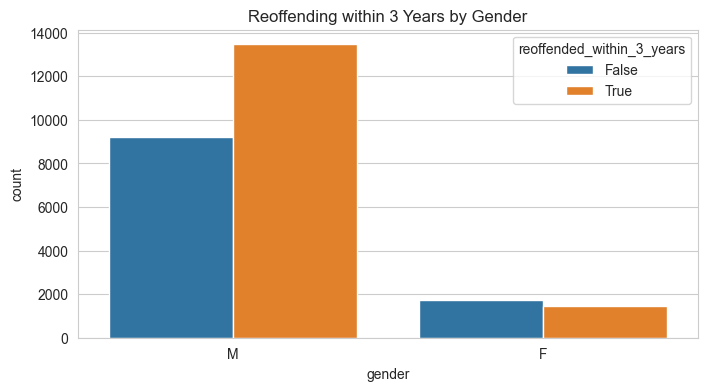

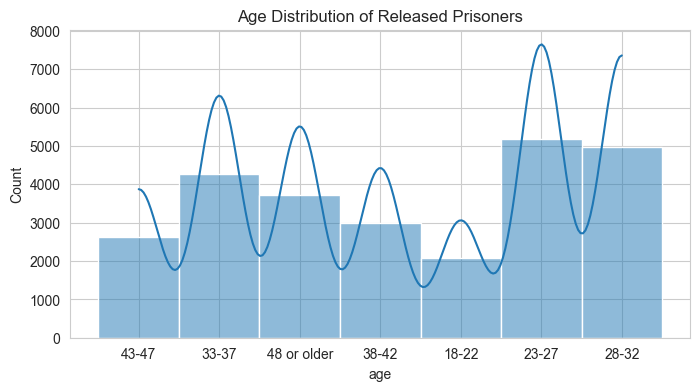

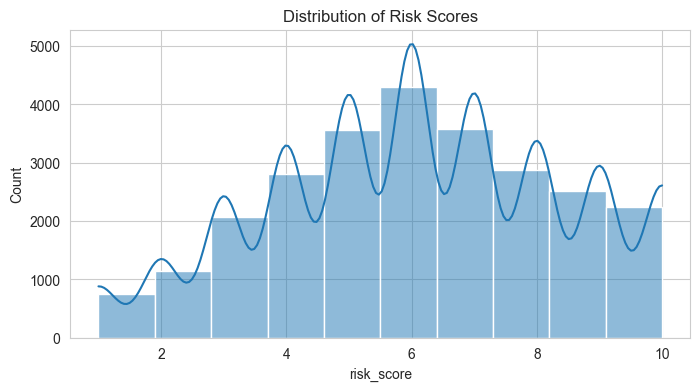

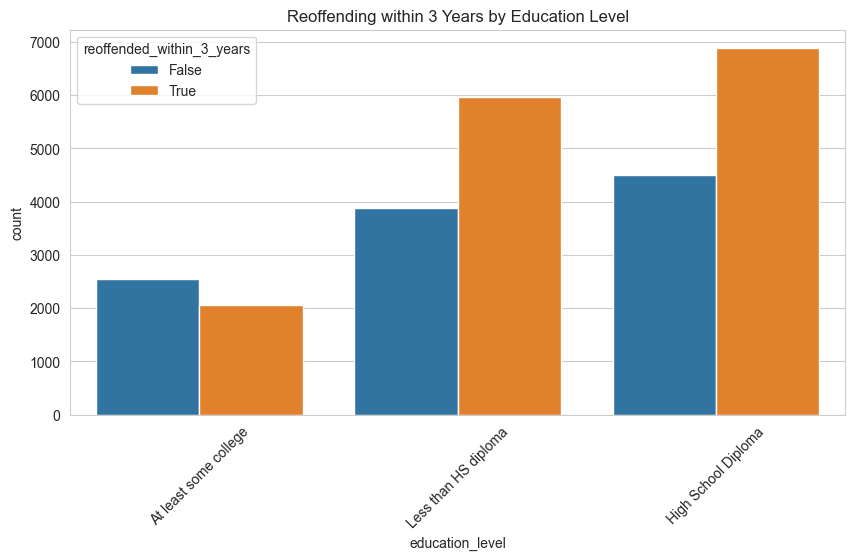

In [4]:
#Exploratory Data Analysis
#creation of some visualizations to understand the distribution and relationships of the features

#set up the visualisation settings
sns.set_style("whitegrid")

#since this is EDA i'll work with the original non-encoded and non-normalized data
#because it's easier to interpret the plots with actual category names and non-scaled values.

#the distribution of the target variable 'reoffended_within_3_years'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='reoffended_within_3_years')
plt.title('Distribution of Reoffending within 3 Years')
plt.show()

#correlation between race & reoffending
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='race', hue='reoffended_within_3_years')
plt.title('Reoffending within 3 Years by Race')
plt.show()

#relationship between gender and reoffending
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='gender', hue='reoffended_within_3_years')
plt.title('Reoffending within 3 Years by Gender')
plt.show()

#age distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution of Released Prisoners')
plt.show()

#distribution of risk scores
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='risk_score', bins=10, kde=True)
plt.title('Distribution of Risk Scores')
plt.show()

#relationship between education level and reoffending
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education_level', hue='reoffended_within_3_years')
plt.title('Reoffending within 3 Years by Education Level')
plt.xticks(rotation=45)
plt.show()



## EDA
This step is crucial as it allows to visually explore the data and uncover any patterns or anomalies that could influence the model's predictions <br>

I'm using 'matplotlib' and 'seaborn' as per your recommendation, i'm trying to make simple bar plots for the visualization <br>
i think they're simple and convey the message fairly well<br>


In [5]:
#Feature Engineering
#based on the EDA, I want to create some new features that could help in predicting reoffending

#potential feature could be the total number of arrests
arrest_types = ['felony_arrests', 'misdemeanor_arrests', 'violence_arrests', 
                'property_arrests', 'drug_arrests', 'parole_violation_arrests', 
                'domestic_violence_arrests', 'gun_arrests']

#potential feature could be the total number of convictions, similar to arrests
conviction_types = ['felony_convictions', 'misdemeanor_convictions', 'violence_convictions', 
                    'property_convictions', 'drug_convictions', 'parole_violation_convictions', 

                    'domestic_violence_convictions', 'gun_convictions']

#converting all arrest and conviction columns to numeric
for col in arrest_types + conviction_types:

    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

#summing up
df['total_arrests'] = df[arrest_types].sum(axis=1)

df['total_convictions'] = df[conviction_types].sum(axis=1)


#feature that represents the ratio of convictions to arrests
#to understand if a higher conviction rate affects reoffending
#to avoid division by zero, added a small number (epsilon) to the denominator
epsilon = 1e-4
df['conviction_arrest_ratio'] = df['total_convictions'] / (df['total_arrests'] + epsilon)


#for prison_term_age_ratio, ensuring 'years_in_prison' and 'age' are numeric

df['years_in_prison'] = pd.to_numeric(df['years_in_prison'], errors='coerce').fillna(0)

df['age'] = pd.to_numeric(df['age'], errors='coerce').fillna(0)

df['prison_term_age_ratio'] = df['years_in_prison'] / (df['age'] + epsilon)


#re-encode the updated dataframe and re-normalize the numerical features.
#encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

#normalize the new numerical features
new_numerical_features = ['total_arrests', 'total_convictions', 'conviction_arrest_ratio', 'prison_term_age_ratio']
#do not include the 'id' column or any other non-feature column
numerical_features_to_normalize = new_numerical_features + [col for col in df_encoded.columns if col.startswith('risk_score') or col.startswith('days_') or col.startswith('jobs_')]
df_encoded[numerical_features_to_normalize] = scaler.fit_transform(df_encoded[numerical_features_to_normalize])

# Check the dataset after reprocessing
df_encoded_head_fe = df_encoded.head()
df_encoded_info_fe = df_encoded.info()

df_encoded_head_fe, df_encoded_info_fe



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Columns: 104 entries, id to reoffended_in_year_3_True
dtypes: bool(90), float64(12), int64(2)
memory usage: 5.0 MB


(   id  address  risk_score  days_between_drug_tests  marijuana_positive_tests  \
 0   1       16   -1.305700                 5.084251                  0.000000   
 1   2       16   -0.034205                -0.473872                  0.000000   
 2   3       24    0.389627                 0.085477                  0.333333   
 3   4       16    0.389627                -0.572883                  0.000000   
 4   5       16   -0.881869                -0.594894                  0.000000   
 
    cocaine_positive_tests  meth_positive_tests  other_positive_tests  \
 0                     0.0             0.000000                   0.0   
 1                     0.0             0.000000                   0.0   
 2                     0.0             0.166667                   0.0   
 3                     0.0             0.000000                   0.0   
 4                     0.0             0.058824                   0.0   
 
    days_employed  jobs_per_year  ...  num_unexcused_absences_2  \

## Feature Engineering
- Engineer new features that could be relevant for prediction. 
- e.g., total arrests/convictions, conviction-to-arrest ratio

In [6]:
#Model Selection, Training, and Evaluation

#importing the necessary functions from scikit-learn
#unsure of whether I should have put this at the beginning
#since i plan on importing more classifiers later on, to try a few of them out
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#since i want to predict whether a person will reoffend within 3 years, i selected this as our target variable
target = 'reoffended_within_3_years_True'
features = df_encoded.columns.drop(['id', target])  # drop 'id' as it's just an identifier, not a feature

#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded[features], df_encoded[target], test_size=0.2, random_state=42)

#Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#training the model
rf_classifier.fit(X_train, y_train)

#predict on the test set
y_pred = rf_classifier.predict(X_test)

#evaluation
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, class_report, conf_matrix



(1.0,
 '              precision    recall  f1-score   support\n\n       False       1.00      1.00      1.00      2180\n        True       1.00      1.00      1.00      2987\n\n    accuracy                           1.00      5167\n   macro avg       1.00      1.00      1.00      5167\nweighted avg       1.00      1.00      1.00      5167\n',
 array([[2180,    0],
        [   0, 2987]], dtype=int64))

## Actual Model Selection, Training & Evaluation
The target as per assignment brief is the 'reoffended_within_3_years_True' parameter<br>
I chose the Random Forest Classifier as the first classifier i want to try out<br>
I started by splitting the dataset into training and testing sets<br>
After training the model i evaluated it, starting with accuracy as a common starting point<br><br>

The accuracy that I got back was EXTREMELY good, which was very suspicious and disappointing, because that meant something was likely going wrong<br>


In [7]:
from sklearn.model_selection import cross_val_score

#cross-validation
cv_scores = cross_val_score(rf_classifier, df_encoded[features], df_encoded[target], cv=5, scoring='accuracy')

#getting accuracy and standard deviation
cv_scores.mean(), cv_scores.std()


(0.999961292819818, 7.741436036385886e-05)

## Cross-Validation
Again,results are way too good to be true - 99% accuracy and very small standard deviation <br>
so i'll try some checks to find out what is happening that is wrong, might be overfitting

In [8]:
#checking for overfitting
#will compare the model's performance on the training data and the test data
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

#predicting on the test set (y_pred from before)
test_accuracy = accuracy_score(y_test, y_pred)

#accuracy
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 1.0


## Overfitting Check
the low discrepancy between the results usually means that it's not overfitting <br>
so the result '1' & '1' should be fine

In [9]:
#correlation matrix
correlation_matrix = df_encoded.corr()

#isolating the correlations with the target variable
target_correlations = correlation_matrix[target].sort_values(ascending=False)

#dispaling features with highest correlation with target
print(target_correlations.head(10))


reoffended_within_3_years_True       1.000000
reoffended_in_year_1_True            0.559279
reoffended_in_year_2_True            0.396854
reoffended_in_year_3_True            0.287275
gang_affiliated_True                 0.184664
risk_score                           0.176826
marijuana_positive_tests             0.113949
mh_sa_programme_True                 0.113856
total_convictions                    0.105360
parole_violation_convictions_True    0.095618
Name: reoffended_within_3_years_True, dtype: float64


## Data Leakage
these results indicate that some features have some very high correlation <br>
especially 'reoffended_within_3_years_True' which would definitely tamper with the  <br>
prediction ability of the model

In [10]:
#so, i'm going to remove these features to avoid leakage.
leakage_features = ['reoffended_in_year_1_True', 'reoffended_in_year_2_True', 'reoffended_in_year_3_True']
features_no_leakage = df_encoded.columns.drop(['id', target] + leakage_features)


#i needed to put this here because later down the line i will be using gender to determine bias withing random forest
gender_series = df['gender']


#re-splitting dataset into training and test sets
X_train_no_leakage, X_test_no_leakage, y_train_no_leakage, y_test_no_leakage, gender_train, gender_test = train_test_split(
    df_encoded[features_no_leakage], df_encoded[target], gender_series, test_size=0.2, random_state=42
)

#re-initializing the RFC
rf_classifier_no_leakage = RandomForestClassifier(n_estimators=100, random_state=42)

#re-training
rf_classifier_no_leakage.fit(X_train_no_leakage, y_train_no_leakage)

#prediction
y_pred_no_leakage = rf_classifier_no_leakage.predict(X_test_no_leakage)

#evaluation
accuracy_no_leakage = accuracy_score(y_test_no_leakage, y_pred_no_leakage)
class_report_no_leakage = classification_report(y_test_no_leakage, y_pred_no_leakage)
conf_matrix_no_leakage = confusion_matrix(y_test_no_leakage, y_pred_no_leakage)

accuracy_no_leakage, class_report_no_leakage, conf_matrix_no_leakage

(0.7315657054383589,
 '              precision    recall  f1-score   support\n\n       False       0.73      0.58      0.65      2180\n        True       0.73      0.84      0.78      2987\n\n    accuracy                           0.73      5167\n   macro avg       0.73      0.71      0.72      5167\nweighted avg       0.73      0.73      0.73      5167\n',
 array([[1271,  909],
        [ 478, 2509]], dtype=int64))

# Re-training model
Instantiated new model features with no leakage<br>


these results are a lot better, <br>
73% is decent and doesn't necessarily indicate any funny shenanigans

In [11]:
#i'm going to import some more classifiers, to test and see the accuracy for this dataset
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train_no_leakage, y_train_no_leakage)
y_pred_gb = gb_classifier.predict(X_test_no_leakage)
accuracy_gb = accuracy_score(y_test_no_leakage, y_pred_gb)

#Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train_no_leakage, y_train_no_leakage)
y_pred_lr = lr_classifier.predict(X_test_no_leakage)
accuracy_lr = accuracy_score(y_test_no_leakage, y_pred_lr)

#accuracy for both models
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb}")
print(f"Logistic Regression Accuracy: {accuracy_lr}")


Gradient Boosting Classifier Accuracy: 0.7406618927811109
Logistic Regression Accuracy: 0.71066382814012


# Different Model Comparison
the results assess that, Gradient Boosting Classifier leads with 74%, <br>
Logistic Regression falls behind at 71%, and the Random forest is the middleweight with 73% accuracy.<br>
for the purpose of this assignment i'll stick with Random Forest for now, and try to determine some bias.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#function to calculate and print metrics for different groups
def print_metrics_by_group(y_true, y_pred, group_info):
    unique_groups = np.unique(group_info)
    
    for group in unique_groups:
        mask = group_info == group
        print(f"Metrics for {group}:")
        print(f"Accuracy: {accuracy_score(y_true[mask], y_pred[mask]):.2f}")
        print(f"Precision: {precision_score(y_true[mask], y_pred[mask], zero_division=0):.2f}")
        print(f"Recall: {recall_score(y_true[mask], y_pred[mask]):.2f}")
        print(f"F1 Score: {f1_score(y_true[mask], y_pred[mask]):.2f}")
        print("")


#use the correct variables for prediction and evaluation
y_pred_no_leakage = rf_classifier_no_leakage.predict(X_test_no_leakage)
print_metrics_by_group(y_test_no_leakage, y_pred_no_leakage, gender_test)


Metrics for F:
Accuracy: 0.69
Precision: 0.62
Recall: 0.76
F1 Score: 0.68

Metrics for M:
Accuracy: 0.74
Precision: 0.75
Recall: 0.85
F1 Score: 0.79



# Bias
i'm trying to do some bias analyses based on gender information <br>
it appears as though the model is far more accurate for men than for women <br> 
it has higher precision for men (75%) compared to women (62%) meaning it it far less likely to <br>
falsely label a non-reoffender as a reoffender for men.<br><br>
the discrepancies really suggest the model is biased, <br>
i'm going to make an assumption here and say that this is due to <br>
way less sample size for women as opposed to men, since men <br>
on average commit way more crimes.

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Get unique classes from the target variable
unique_classes = y_train_no_leakage.unique()

#creating a dictionary for class weights.
#i'm going to play around with the numbers a little here, and try to get the best result.
#i think 1.7 is the real winner here
class_weights = {unique_classes[0]: 1.7, unique_classes[1]: 1.0}

#initialize the classifier with the custom class weights
rf_classifier_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)

#fit the model on the training data
rf_classifier_balanced.fit(X_train_no_leakage, y_train_no_leakage)

#predict on the test data
y_pred_balanced = rf_classifier_balanced.predict(X_test_no_leakage)

#assuming that you have a function print_metrics_by_group defined
print_metrics_by_group(y_test_no_leakage, y_pred_balanced, gender_test)


Metrics for F:
Accuracy: 0.70
Precision: 0.64
Recall: 0.77
F1 Score: 0.70

Metrics for M:
Accuracy: 0.74
Precision: 0.75
Recall: 0.85
F1 Score: 0.80



# Adjusting Class Weights

i adjusted the `class_weight` parameter in the RandomForestClassifier. <br> 
this parameter allows to give more importance to the underrepresented or underperforming class <br>
('F') during the model's training process.

after some experimenting, I found that a weight of 1.7 for the 'F' group and 1.0 for the 'M' group improved the model's fairness metrics.


Before: --------------> After:<br>
Metrics for F:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Metrics for F:<br>
Accuracy: 0.69&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Accuracy: 0.70<br>
Precision: 0.62&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Precision: 0.64<br>
Recall: 0.76&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall: 0.77<br>
F1 Score: 0.68&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;F1 Score: 0.70<br><br>

Metrics for M:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Metrics for M:<br>
Accuracy: 0.74&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Accuracy: 0.74<br>
Precision: 0.75&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Precision: 0.75<br>
Recall: 0.85&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall: 0.85<br>
F1 Score: 0.79&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;F1 Score: 0.80

I think it's a farily successfull attempt at mitigating some bias. <br>
as pretty much all metrics for 'F' have improved, and metrics for 'M' have stayed the same/improved also.


In [14]:
from sklearn.model_selection import GridSearchCV

#parameter grid for class weights
class_weight_options = [{unique_classes[0]: w, unique_classes[1]: 1.0} for w in [1.0, 1.5, 1.7, 2.0]]

#grid search with cross-validation
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    param_grid={'class_weight': class_weight_options},
    scoring='f1',  # Choose an appropriate scoring metric
    cv=5
)

#perform the grid search on the training data
grid_search_cv.fit(X_train_no_leakage, y_train_no_leakage)

#get the best class weight from the grid search
best_class_weight = grid_search_cv.best_params_['class_weight']


## Fine-Tuning Class Weights


I thought maybe it'd be a good idea to automate the search for optimal class weights <br>
so i employed grid search with cross validation, with a range of different values <br>
i prioritisied best F1 score, since I thought it preserves a good balance


In [15]:
from sklearn.ensemble import GradientBoostingClassifier

#initialize the Gradient Boosting Classifier with the best class weight
gb_classifier = GradientBoostingClassifier(random_state=42)

#fit the model on the training data using the best class weight found
gb_classifier.fit(X_train_no_leakage, y_train_no_leakage, sample_weight=[best_class_weight.get(i, 1.0) for i in y_train_no_leakage])

#predict on the test data
y_pred_gb = gb_classifier.predict(X_test_no_leakage)

#evaluate the predictions
print_metrics_by_group(y_test_no_leakage, y_pred_gb, gender_test)


Metrics for F:
Accuracy: 0.69
Precision: 0.70
Recall: 0.54
F1 Score: 0.61

Metrics for M:
Accuracy: 0.73
Precision: 0.80
Recall: 0.73
F1 Score: 0.77



## Alternative Models

I wanted to try the Gradient Boosting Classifier, since it had the best results before.<br>
i used the best determined class weights that i automated <br>

The precision scores, were the best I've had so far <br>
I think targetting the F1 score was really important.
The recall for 'F' was really low though, compared to the RandomForestClassifier.

## References

"Python for Data Analysis" by Wes McKinney, Chapter 7: Data Cleaning and Preparation<br><br>
Pandas Documentation (https://pandas.pydata.org/docs/) for things like get_dummies(), etc. <br><br>
scikit-learn Documentation (https://scikit-learn.org/stable/user_guide.html), particularly on:
- StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- GridSearchCV https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- RandomForestClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html